In [1]:
from matplotlib import pyplot as pylt
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy import stats

In [2]:
df = pd.read_csv('~/Documents/manual_segmentation_results/mesh.csv')

Fill NaN values with overall dataset mean.

In [3]:
print(f'Filling {df[df.isna().any(axis=1)].shape[0]} instances containing NaN values.')

Filling 0 instances containing NaN values.


In [4]:
d = defaultdict()
for column in df.columns:
    d[column] = df[column].mean()

In [5]:
df.fillna(value=d, inplace=True)

Filter out extreme outliers (deviating more than 5 standard deviations from the mean).


In [6]:
numrows = df.shape[0]
df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
print(f'Filtered out {numrows - df.shape[0]} instances.')

Filtered out 11 instances.


In [7]:
df

,dir,ecLF,ccLF,icLF,icMF,ccMF,ecMF,pLF,pMF,aF,...,cLT.aMiv,aLT.aSD,aLT.aMav,aLT.aMiv,pLT.aSD,pLT.aMav,pLT.aMiv,aMT.aSD,aMT.aMav,aMT.aMiv
0,9162498,2.903695,4.475662,2.857976,3.658111,5.295121,4.012282,4.434819,4.394790,4.080811,...,2.303032,0.602061,2.472083,0.506712,0.567253,4.322688,2.201482,0.818140,4.084486,1.237156
1,9211751,2.593985,4.476326,3.466743,3.723974,5.320509,3.779541,4.459079,4.423569,4.326471,...,1.696520,0.642078,3.059067,0.826179,0.642652,3.398810,1.127346,1.050378,4.352659,0.976428
2,9230284,2.630855,4.338724,2.465991,2.639488,3.620348,3.123111,4.524523,3.247976,7.662514,...,2.428804,0.793819,3.820849,1.062597,0.742499,2.948327,0.641853,1.516253,5.627801,0.933828
3,9156526,2.345612,3.725846,2.809308,3.751718,4.200057,2.470332,4.078189,3.751649,3.722615,...,1.462683,0.501275,2.175363,0.510827,0.430463,2.547570,0.869753,1.037462,4.016594,0.694894
4,9246518,2.615924,4.350340,3.380252,3.514229,4.341194,3.688226,4.296965,4.553811,6.937016,...,0.689706,0.655176,3.583725,1.240979,0.887163,4.714226,1.585059,1.237091,4.845011,0.732662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,9141244,2.340481,3.754788,3.234781,4.240838,5.137140,3.035360,4.142894,4.209006,5.577304,...,3.196770,1.154019,4.931024,1.040863,0.766434,4.081567,1.283648,0.957104,3.704998,0.512861
503,9001104,1.497936,1.952874,2.726231,2.350335,3.010027,2.283869,3.490246,3.062639,5.071629,...,1.461436,0.610544,2.929912,0.827237,0.681776,2.970266,0.699715,0.739821,3.177977,0.686898
504,9034644,1.234481,2.879518,2.733981,3.115157,3.427025,2.340748,3.430749,3.704998,6.379266,...,1.542924,0.906822,3.968514,0.786889,0.586312,3.387805,1.154723,2.069963,7.130333,1.069595
505,9109448,4.374931,6.213975,4.592849,3.605116,3.370267,2.992250,4.634025,4.485015,7.751497,...,2.198821,1.025622,4.270746,0.794027,0.897548,3.901959,0.720128,1.238874,5.562594,1.233789


In [8]:
df.columns

Index(['dir', 'ecLF', 'ccLF', 'icLF', 'icMF', 'ccMF', 'ecMF', 'pLF', 'pMF',
       'aF', 'ccLF.aSD', 'ccLF.aMav', 'ccLF.aMiv', 'aF.aSD', 'aF.aMav',
       'aF.aMiv', 'ecMF.aSD', 'ecMF.aMav', 'ecMF.aMiv', 'ccMF.aSD',
       'ccMF.aMav', 'ccMF.aMiv', 'ecLF.aSD', 'ecLF.aMav', 'ecLF.aMiv',
       'pLF.aSD', 'pLF.aMav', 'pLF.aMiv', 'icMF.aSD', 'icMF.aMav', 'icMF.aMiv',
       'pMF.aSD', 'pMF.aMav', 'pMF.aMiv', 'icLF.aSD', 'icLF.aMav', 'icLF.aMiv',
       'cLT', 'aLT', 'eLT', 'pLT', 'iLT', 'cMT', 'aMT', 'eMT', 'pMT', 'iMT',
       'cMT.aSD', 'cMT.aMav', 'cMT.aMiv', 'iLT.aSD', 'iLT.aMav', 'iLT.aMiv',
       'eMT.aSD', 'eMT.aMav', 'eMT.aMiv', 'pMT.aSD', 'pMT.aMav', 'pMT.aMiv',
       'eLT.aSD', 'eLT.aMav', 'eLT.aMiv', 'iMT.aSD', 'iMT.aMav', 'iMT.aMiv',
       'cLT.aSD', 'cLT.aMav', 'cLT.aMiv', 'aLT.aSD', 'aLT.aMav', 'aLT.aMiv',
       'pLT.aSD', 'pLT.aMav', 'pLT.aMiv', 'aMT.aSD', 'aMT.aMav', 'aMT.aMiv'],
      dtype='object')

In [9]:
eclf = df['ecLF']
cclf = df['ccLF']
iclf = df['icLF']
icmf = df['icMF']
ccmf = df['ccMF']
ecmf = df['ecMF']

elt = df['eLT']
plt = df['pLT']
ilt = df['iLT']
alt = df['aLT']
clt = df['cLT']

emt = df['eMT']
pmt = df['pMT']
imt = df['iMT']
amt = df['aMT']
cmt = df['cMT']

plf = df['pLF']
pmf = df['pMF']
af = df['aF']

In [10]:
xs = np.arange(0, df.shape[0])
len(xs)

496

# Mesh

## Subregion scatters

### Femur

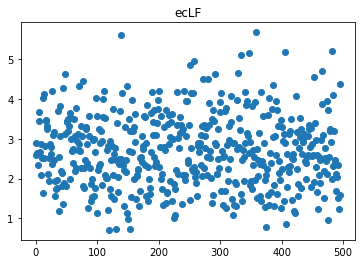

In [11]:
ys = eclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

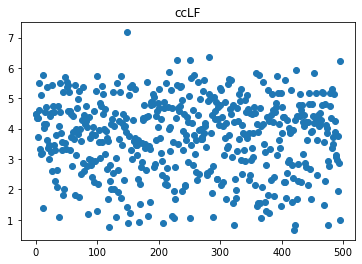

In [12]:
ys = cclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

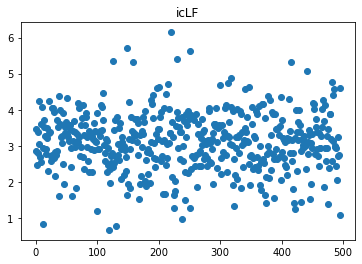

In [13]:
ys = iclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

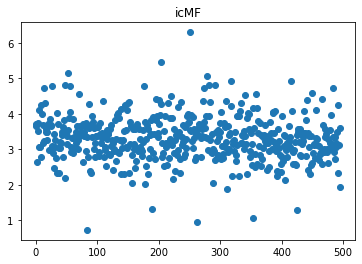

In [14]:
ys = icmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

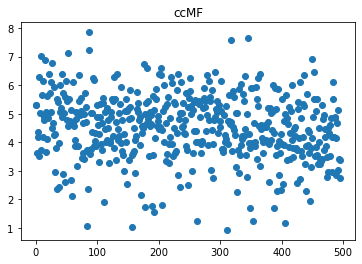

In [15]:
ys = ccmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

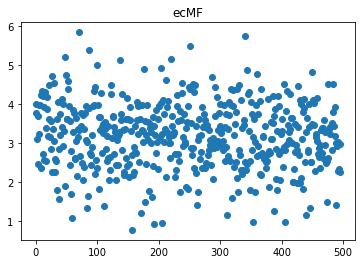

In [16]:
ys = ecmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

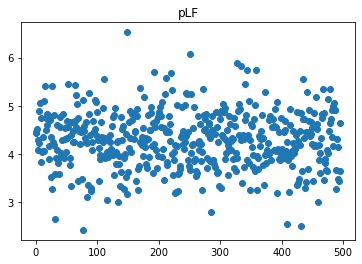

In [17]:
ys = plf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

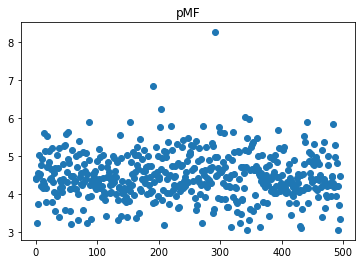

In [18]:
ys = pmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

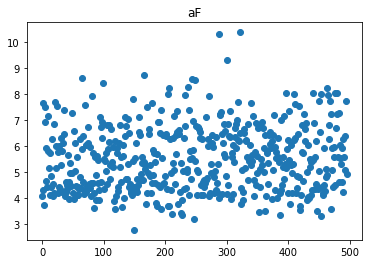

In [19]:
ys = af.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

### Tibia

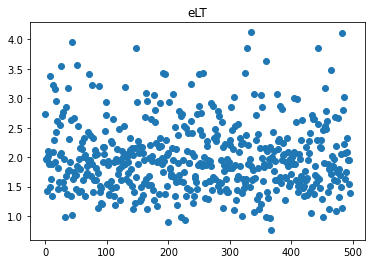

In [20]:
ys = elt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

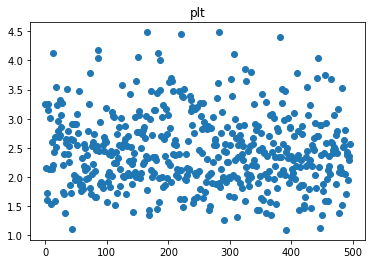

In [21]:
ys = plt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('plt')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

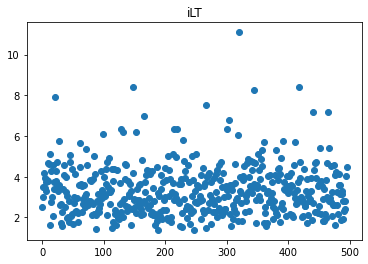

In [22]:
ys = ilt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

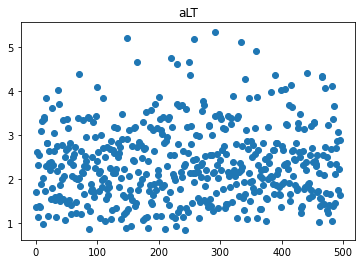

In [23]:
ys = alt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

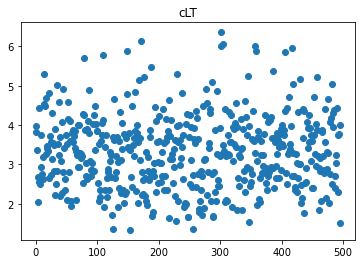

In [24]:
ys = clt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

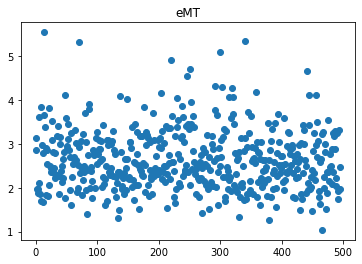

In [25]:
ys = emt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

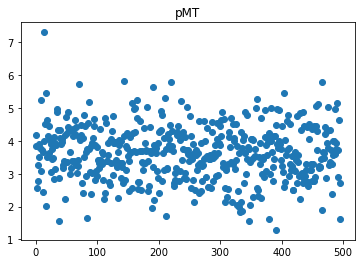

In [26]:
ys = pmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

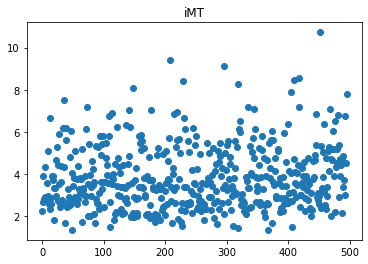

In [27]:
ys = imt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

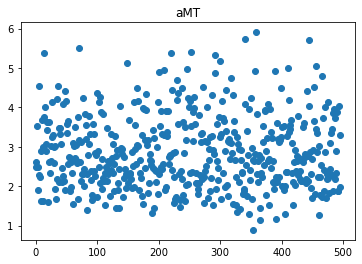

In [28]:
ys = amt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

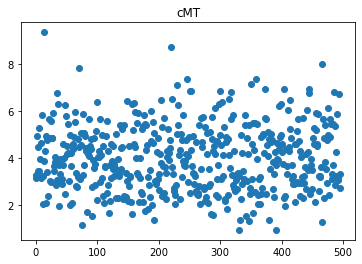

In [29]:
ys = cmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

## Subregion boxplots

### Femur

Segmentation 9750090.0 is an outlier (2.98 total deviation from median)
Segmentation 9341240.0 is an outlier (2.52 total deviation from median)
Segmentation 9388068.0 is an outlier (3.05 total deviation from median)
Segmentation 9102858.0 is an outlier (2.56 total deviation from median)
Segmentation 9130672.0 is an outlier (2.58 total deviation from median)


Text(0.5, 1.0, 'ecLF')

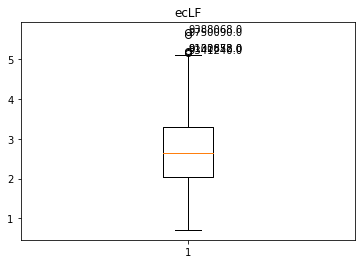

In [30]:
ys = eclf.to_numpy()
pylt.boxplot(ys)
q1 = eclf.quantile(.25)
q3 = eclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - eclf.median()):.2f} total deviation from median)')
        
pylt.title('ecLF')

Text(0.5, 1.0, 'ccLF')

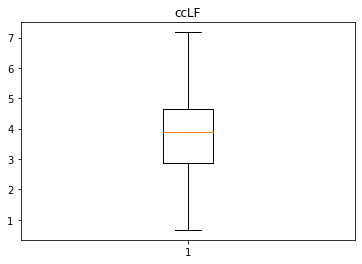

In [31]:
ys = cclf.to_numpy()
pylt.boxplot(ys)
q1 = cclf.quantile(.25)
q3 = cclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cclf.median()):.2f} total deviation from median)')
        
pylt.title('ccLF')

Segmentation 9215922.0 is an outlier (2.31 total deviation from median)
Segmentation 9988421.0 is an outlier (1.97 total deviation from median)
Segmentation 9943227.0 is an outlier (2.48 total deviation from median)
Segmentation 9908089.0 is an outlier (2.20 total deviation from median)
Segmentation 9745458.0 is an outlier (2.37 total deviation from median)
Segmentation 9606490.0 is an outlier (2.56 total deviation from median)
Segmentation 9624170.0 is an outlier (2.17 total deviation from median)
Segmentation 9518267.0 is an outlier (2.99 total deviation from median)
Segmentation 9468561.0 is an outlier (2.24 total deviation from median)
Segmentation 9441432.0 is an outlier (2.19 total deviation from median)
Segmentation 9410941.0 is an outlier (2.47 total deviation from median)
Segmentation 9049223.0 is an outlier (2.16 total deviation from median)
Segmentation 9044005.0 is an outlier (1.90 total deviation from median)
Segmentation 9108714.0 is an outlier (1.91 total deviation from 

Text(0.5, 1.0, 'icLF')

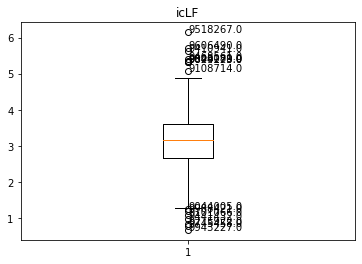

In [32]:
ys = iclf.to_numpy()
pylt.boxplot(ys)
q1 = iclf.quantile(.25)
q3 = iclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - iclf.median()):.2f} total deviation from median)')
        
pylt.title('icLF')

Segmentation 9154793.0 is an outlier (1.42 total deviation from median)
Segmentation 9223980.0 is an outlier (1.48 total deviation from median)
Segmentation 9222973.0 is an outlier (1.52 total deviation from median)
Segmentation 9180558.0 is an outlier (1.86 total deviation from median)
Segmentation 9212052.0 is an outlier (1.48 total deviation from median)
Segmentation 9223590.0 is an outlier (2.56 total deviation from median)
Segmentation 9766939.0 is an outlier (1.50 total deviation from median)
Segmentation 9672573.0 is an outlier (1.97 total deviation from median)
Segmentation 9481413.0 is an outlier (2.17 total deviation from median)
Segmentation 9410941.0 is an outlier (3.00 total deviation from median)
Segmentation 9517311.0 is an outlier (2.34 total deviation from median)
Segmentation 9510418.0 is an outlier (1.44 total deviation from median)
Segmentation 9460377.0 is an outlier (1.77 total deviation from median)
Segmentation 9469318.0 is an outlier (1.50 total deviation from 

Text(0.5, 1.0, 'icMF')

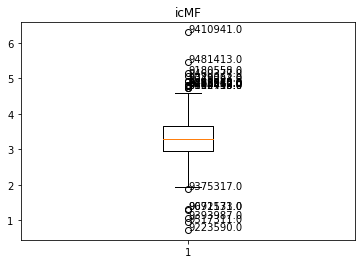

In [33]:
ys = icmf.to_numpy()
pylt.boxplot(ys)
q1 = icmf.quantile(.25)
q3 = icmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - icmf.median()):.2f} total deviation from median)')
        
pylt.title('icMF')

Segmentation 9223590.0 is an outlier (3.51 total deviation from median)
Segmentation 9241424.0 is an outlier (3.29 total deviation from median)
Segmentation 9781749.0 is an outlier (3.54 total deviation from median)
Segmentation 9691663.0 is an outlier (3.02 total deviation from median)
Segmentation 9517311.0 is an outlier (3.35 total deviation from median)
Segmentation 9375317.0 is an outlier (3.64 total deviation from median)
Segmentation 9329062.0 is an outlier (3.00 total deviation from median)
Segmentation 9332345.0 is an outlier (3.10 total deviation from median)
Segmentation 9371267.0 is an outlier (2.87 total deviation from median)
Segmentation 9393987.0 is an outlier (3.34 total deviation from median)
Segmentation 9344856.0 is an outlier (2.86 total deviation from median)
Segmentation 9048192.0 is an outlier (3.40 total deviation from median)


Text(0.5, 1.0, 'ccMF')

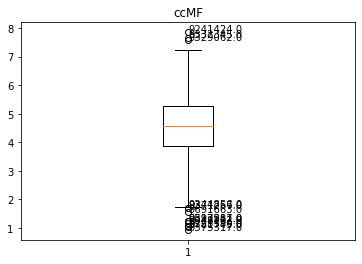

In [34]:
ys = ccmf.to_numpy()
pylt.boxplot(ys)
q1 = ccmf.quantile(.25)
q3 = ccmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ccmf.median()):.2f} total deviation from median)')
        
pylt.title('ccMF')

Segmentation 9249025.0 is an outlier (2.61 total deviation from median)
Segmentation 9781749.0 is an outlier (2.45 total deviation from median)
Segmentation 9691663.0 is an outlier (2.31 total deviation from median)
Segmentation 9410941.0 is an outlier (2.26 total deviation from median)
Segmentation 9311328.0 is an outlier (2.53 total deviation from median)


Text(0.5, 1.0, 'ecMF')

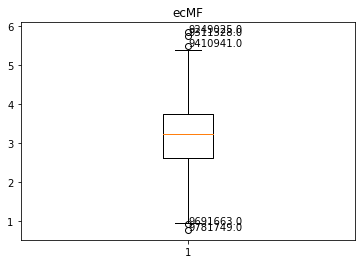

In [35]:
ys = ecmf.to_numpy()
pylt.boxplot(ys)
q1 = ecmf.quantile(.25)
q3 = ecmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ecmf.median()):.2f} total deviation from median)')
        
pylt.title('ecMF')

Segmentation 9211049.0 is an outlier (1.64 total deviation from median)
Segmentation 9160801.0 is an outlier (1.87 total deviation from median)
Segmentation 9606490.0 is an outlier (2.23 total deviation from median)
Segmentation 9410941.0 is an outlier (1.78 total deviation from median)
Segmentation 9397988.0 is an outlier (1.59 total deviation from median)
Segmentation 9120941.0 is an outlier (1.75 total deviation from median)
Segmentation 9036770.0 is an outlier (1.78 total deviation from median)


Text(0.5, 1.0, 'pLF')

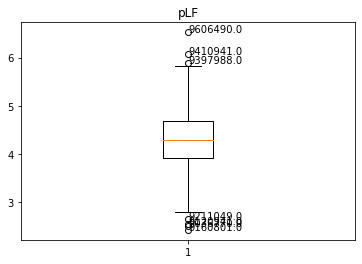

In [36]:
ys = plf.to_numpy()
pylt.boxplot(ys)
q1 = plf.quantile(.25)
q3 = plf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plf.median()):.2f} total deviation from median)')
        
pylt.title('pLF')

Segmentation 9598683.0 is an outlier (2.41 total deviation from median)
Segmentation 9481413.0 is an outlier (1.82 total deviation from median)
Segmentation 9493245.0 is an outlier (3.84 total deviation from median)
Segmentation 9311328.0 is an outlier (1.61 total deviation from median)
Segmentation 9278228.0 is an outlier (1.55 total deviation from median)


Text(0.5, 1.0, 'pMF')

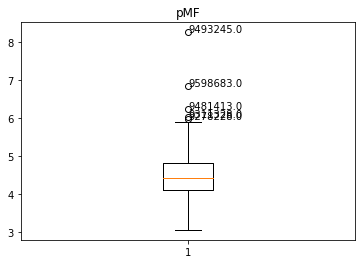

In [37]:
ys = pmf.to_numpy()
pylt.boxplot(ys)
q1 = pmf.quantile(.25)
q3 = pmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmf.median()):.2f} total deviation from median)')
        
pylt.title('pMF')

Segmentation 9504056.0 is an outlier (4.93 total deviation from median)
Segmentation 9284505.0 is an outlier (4.98 total deviation from median)


Text(0.5, 1.0, 'aF')

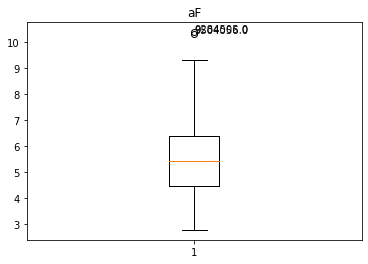

In [38]:
ys = af.to_numpy()
pylt.boxplot(ys)
q1 = af.quantile(.25)
q3 = af.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - af.median()):.2f} total deviation from median)')
        
pylt.title('aF')

### Tibia

Segmentation 9186589.0 is an outlier (1.45 total deviation from median)
Segmentation 9218935.0 is an outlier (1.64 total deviation from median)
Segmentation 9223789.0 is an outlier (2.04 total deviation from median)
Segmentation 9180558.0 is an outlier (1.65 total deviation from median)
Segmentation 9249025.0 is an outlier (1.49 total deviation from median)
Segmentation 9606490.0 is an outlier (1.93 total deviation from median)
Segmentation 9691663.0 is an outlier (1.51 total deviation from median)
Segmentation 9566781.0 is an outlier (1.50 total deviation from median)
Segmentation 9471287.0 is an outlier (1.50 total deviation from median)
Segmentation 9494867.0 is an outlier (1.50 total deviation from median)
Segmentation 9376280.0 is an outlier (1.50 total deviation from median)
Segmentation 9397988.0 is an outlier (1.93 total deviation from median)
Segmentation 9395979.0 is an outlier (2.20 total deviation from median)
Segmentation 9388068.0 is an outlier (1.71 total deviation from 

Text(0.5, 1.0, 'eLT')

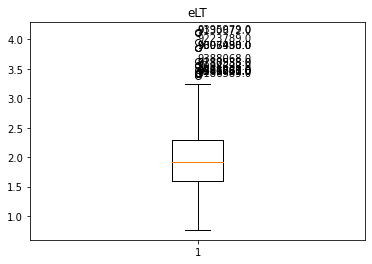

In [39]:
ys = elt.to_numpy()
pylt.boxplot(ys)
q1 = elt.quantile(.25)
q3 = elt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - elt.median()):.2f} total deviation from median)')
        
pylt.title('eLT')

Segmentation 9154793.0 is an outlier (1.73 total deviation from median)
Segmentation 9258562.0 is an outlier (1.78 total deviation from median)
Segmentation 9686590.0 is an outlier (2.08 total deviation from median)
Segmentation 9933836.0 is an outlier (1.73 total deviation from median)
Segmentation 9518267.0 is an outlier (2.05 total deviation from median)
Segmentation 9407052.0 is an outlier (2.09 total deviation from median)
Segmentation 9326707.0 is an outlier (1.71 total deviation from median)
Segmentation 9314341.0 is an outlier (2.00 total deviation from median)


Text(0.5, 1.0, 'pLT')

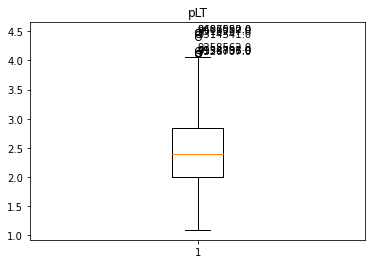

In [40]:
ys = plt.to_numpy()
pylt.boxplot(ys)
q1 = plt.quantile(.25)
q3 = plt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plt.median()):.2f} total deviation from median)')
        
pylt.title('pLT')

Segmentation 9250129.0 is an outlier (4.75 total deviation from median)
Segmentation 9995338.0 is an outlier (3.18 total deviation from median)
Segmentation 9606490.0 is an outlier (5.27 total deviation from median)
Segmentation 9686590.0 is an outlier (3.81 total deviation from median)
Segmentation 9456548.0 is an outlier (3.17 total deviation from median)
Segmentation 9518267.0 is an outlier (3.17 total deviation from median)
Segmentation 9473858.0 is an outlier (4.35 total deviation from median)
Segmentation 9287241.0 is an outlier (3.19 total deviation from median)
Segmentation 9390719.0 is an outlier (3.61 total deviation from median)
Segmentation 9392537.0 is an outlier (7.94 total deviation from median)
Segmentation 9332345.0 is an outlier (5.09 total deviation from median)
Segmentation 9052956.0 is an outlier (5.25 total deviation from median)
Segmentation 9108714.0 is an outlier (4.01 total deviation from median)
Segmentation 9094693.0 is an outlier (4.01 total deviation from 

Text(0.5, 1.0, 'iLT')

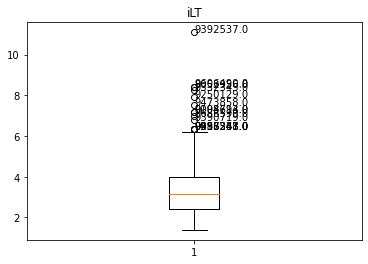

In [41]:
ys = ilt.to_numpy()
pylt.boxplot(ys)
q1 = ilt.quantile(.25)
q3 = ilt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ilt.median()):.2f} total deviation from median)')
        
pylt.title('iLT')

Segmentation 9606490.0 is an outlier (2.97 total deviation from median)
Segmentation 9686590.0 is an outlier (2.42 total deviation from median)
Segmentation 9518267.0 is an outlier (2.51 total deviation from median)
Segmentation 9468561.0 is an outlier (2.36 total deviation from median)
Segmentation 9471287.0 is an outlier (2.42 total deviation from median)
Segmentation 9494867.0 is an outlier (2.95 total deviation from median)
Segmentation 9493245.0 is an outlier (3.09 total deviation from median)
Segmentation 9395979.0 is an outlier (2.87 total deviation from median)
Segmentation 9388068.0 is an outlier (2.66 total deviation from median)


Text(0.5, 1.0, 'aLT')

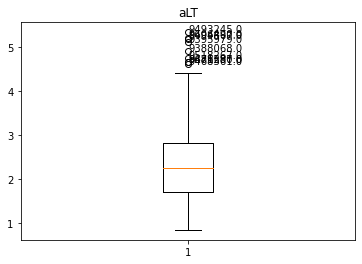

In [42]:
ys = alt.to_numpy()
pylt.boxplot(ys)
q1 = alt.quantile(.25)
q3 = alt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alt.median()):.2f} total deviation from median)')
        
pylt.title('aLT')

Segmentation 9817241.0 is an outlier (2.50 total deviation from median)
Segmentation 9606490.0 is an outlier (2.60 total deviation from median)
Segmentation 9760079.0 is an outlier (2.86 total deviation from median)
Segmentation 9287241.0 is an outlier (2.74 total deviation from median)
Segmentation 9393208.0 is an outlier (3.08 total deviation from median)
Segmentation 9390719.0 is an outlier (2.79 total deviation from median)
Segmentation 9351700.0 is an outlier (2.72 total deviation from median)
Segmentation 9388068.0 is an outlier (2.60 total deviation from median)
Segmentation 9102858.0 is an outlier (2.57 total deviation from median)
Segmentation 9052956.0 is an outlier (2.69 total deviation from median)


Text(0.5, 1.0, 'cLT')

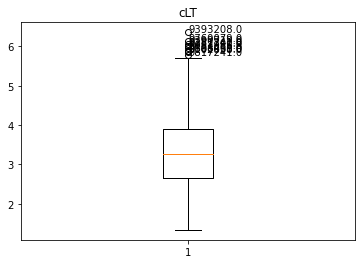

In [43]:
ys = clt.to_numpy()
pylt.boxplot(ys)
q1 = clt.quantile(.25)
q3 = clt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - clt.median()):.2f} total deviation from median)')
        
pylt.title('cLT')

Segmentation 9154793.0 is an outlier (3.00 total deviation from median)
Segmentation 9249025.0 is an outlier (2.78 total deviation from median)
Segmentation 9518267.0 is an outlier (2.38 total deviation from median)
Segmentation 9534875.0 is an outlier (2.02 total deviation from median)
Segmentation 9410941.0 is an outlier (2.17 total deviation from median)
Segmentation 9302260.0 is an outlier (2.56 total deviation from median)
Segmentation 9311328.0 is an outlier (2.80 total deviation from median)
Segmentation 9108714.0 is an outlier (2.12 total deviation from median)


Text(0.5, 1.0, 'eMT')

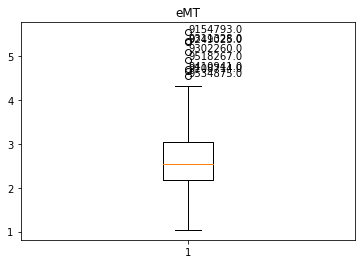

In [44]:
ys = emt.to_numpy()
pylt.boxplot(ys)
q1 = emt.quantile(.25)
q3 = emt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - emt.median()):.2f} total deviation from median)')
        
pylt.title('eMT')

Segmentation 9154793.0 is an outlier (3.67 total deviation from median)
Segmentation 9249025.0 is an outlier (2.09 total deviation from median)
Segmentation 9862541.0 is an outlier (2.20 total deviation from median)
Segmentation 9518267.0 is an outlier (2.15 total deviation from median)
Segmentation 9319367.0 is an outlier (2.35 total deviation from median)
Segmentation 9094693.0 is an outlier (2.15 total deviation from median)


Text(0.5, 1.0, 'pMT')

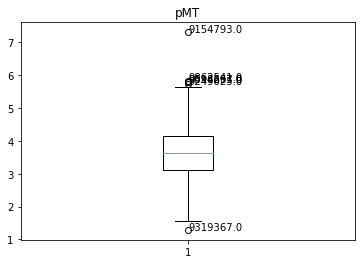

In [45]:
ys = pmt.to_numpy()
pylt.boxplot(ys)
q1 = pmt.quantile(.25)
q3 = pmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmt.median()):.2f} total deviation from median)')
        
pylt.title('pMT')

Segmentation 9606490.0 is an outlier (4.59 total deviation from median)
Segmentation 9458093.0 is an outlier (5.91 total deviation from median)
Segmentation 9468561.0 is an outlier (4.93 total deviation from median)
Segmentation 9539141.0 is an outlier (5.60 total deviation from median)
Segmentation 9369286.0 is an outlier (4.77 total deviation from median)
Segmentation 9049185.0 is an outlier (4.93 total deviation from median)
Segmentation 9052956.0 is an outlier (5.05 total deviation from median)
Segmentation 9052335.0 is an outlier (7.22 total deviation from median)


Text(0.5, 1.0, 'iMT')

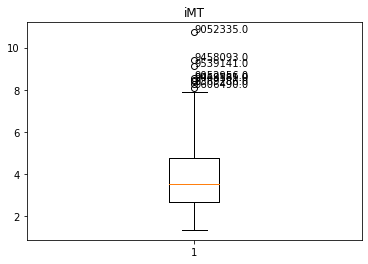

In [46]:
ys = imt.to_numpy()
pylt.boxplot(ys)
q1 = imt.quantile(.25)
q3 = imt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - imt.median()):.2f} total deviation from median)')
        
pylt.title('iMT')

Segmentation 9154793.0 is an outlier (2.68 total deviation from median)
Segmentation 9249025.0 is an outlier (2.79 total deviation from median)
Segmentation 9518267.0 is an outlier (2.67 total deviation from median)
Segmentation 9484408.0 is an outlier (2.70 total deviation from median)
Segmentation 9311328.0 is an outlier (3.03 total deviation from median)
Segmentation 9388068.0 is an outlier (3.20 total deviation from median)
Segmentation 9066770.0 is an outlier (3.00 total deviation from median)


Text(0.5, 1.0, 'aMT')

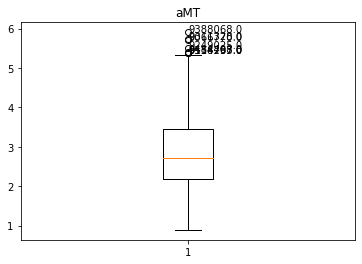

In [47]:
ys = amt.to_numpy()
pylt.boxplot(ys)
q1 = amt.quantile(.25)
q3 = amt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amt.median()):.2f} total deviation from median)')
        
pylt.title('aMT')

Segmentation 9154793.0 is an outlier (5.43 total deviation from median)
Segmentation 9249025.0 is an outlier (3.93 total deviation from median)
Segmentation 9518267.0 is an outlier (4.79 total deviation from median)
Segmentation 9094693.0 is an outlier (4.08 total deviation from median)


Text(0.5, 1.0, 'cMT')

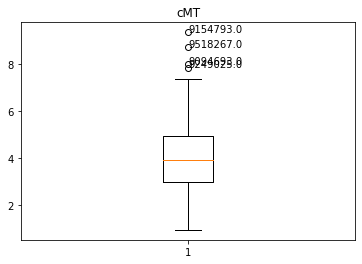

In [48]:
ys = cmt.to_numpy()
pylt.boxplot(ys)
q1 = cmt.quantile(.25)
q3 = cmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cmt.median()):.2f} total deviation from median)')
        
pylt.title('cMT')